# Exploratory visualization

In [59]:
from datetime import datetime

# Resolving paths in a platform agnostic way.
from os.path import dirname, join, realpath

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Manipulating the raw data to save it in a ``.csv`` files.
from pandas import DataFrame, DatetimeIndex

In [60]:
def is_interactive():
    """Check if the script is being run interactively."""
    import __main__ as main

    return not hasattr(main, "__file__")


if is_interactive():
    SCRIPT_DIR = dirname(realpath("__file__"))
else:
    SCRIPT_DIR = dirname(realpath(__file__))

# "../data"
DATA_DIR = join(dirname(SCRIPT_DIR), "data")

## Graphing Cryptocurrency prices

In [61]:
CRYPTOCURRENCIES = [
    "BTC",
    "ETH",
    "DOGE",
    "SOL",
    "AVAX",
]

prices_dataframe = pd.DataFrame()

for cryptocurrency in CRYPTOCURRENCIES:
    temp_dataframe = pd.read_csv(
        join(
            DATA_DIR,
            "raw",
            "crypto",
            f"{cryptocurrency.lower()}_2022_03_05-2022_03_11_minute.csv",
        ),
        # Number of minutes in an hour + header row.
        nrows=61,
    )

    temp_dataframe["time"] = temp_dataframe["time"].transform(
        datetime.fromtimestamp
    )

    temp_dataframe["cryptocurrency"] = cryptocurrency
    prices_dataframe = pd.concat([prices_dataframe, temp_dataframe])

prices_dataframe.head()

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,cryptocurrency
0,0,2022-03-04 12:50:00,40805.94,40782.69,40787.05,20.2100,825274.57,40783.59,direct,NaN,BTC
1,1,2022-03-04 12:51:00,40793.84,40782.67,40783.59,0.7493,30560.29,40793.84,direct,NaN,BTC
2,2,2022-03-04 12:52:00,40798.21,40791.96,40793.84,2.3760,96918.76,40798.03,direct,NaN,BTC
3,3,2022-03-04 12:53:00,40816.49,40797.21,40798.03,4.4880,183210.08,40816.49,direct,NaN,BTC
4,4,2022-03-04 12:54:00,40853.58,40816.49,40816.49,26.0300,1063336.27,40838.92,direct,NaN,BTC


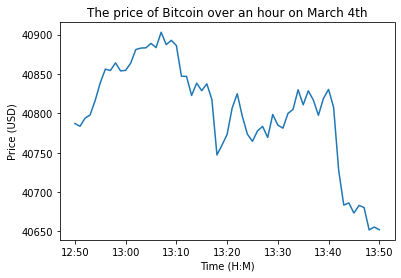

In [62]:
btc_price_dataframe = prices_dataframe[
    prices_dataframe["cryptocurrency"] == "BTC"
]

fig, ax = plt.subplots()

ax.plot(btc_price_dataframe["time"], btc_price_dataframe["open"])

x_formatter = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(x_formatter)

ax.set_xlabel("Time (H:M)")
ax.set_ylabel("Price (USD)")
ax.set_title("The price of Bitcoin over an hour on March 4th")

plt.show()

/tmp/ipykernel_2221/274174129.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=30)  # set new labels


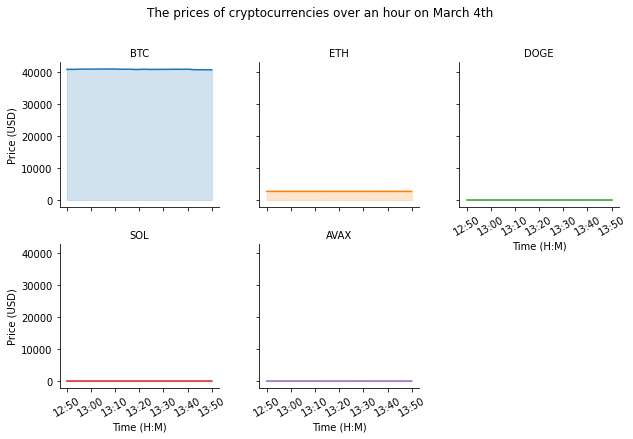

In [63]:
# Create a grid : initialize it
g = sns.FacetGrid(
    prices_dataframe, col="cryptocurrency", hue="cryptocurrency", col_wrap=3
)

# Add the line over the area with the plot function
g = g.map(plt.plot, "time", "open")

# Fill the area with fill_between
g = g.map(plt.fill_between, "time", "open", alpha=0.2).set_titles(
    "{col_name} cryptocurrency"
)

# Set title of entire plot.
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("The prices of cryptocurrencies over an hour on March 4th")

# Control the title and axis labels of each facet
g.set_titles("{col_name}")
g.set_axis_labels("Time (H:M)", "Price (USD)")

# Format dates on the x-axis.
x_formatter = mdates.DateFormatter("%H:%M")
for ax in g.axes.flat:
    labels = ax.get_xticklabels()  # get x labels
    ax.set_xticklabels(labels, rotation=30)  # set new labels
    ax.xaxis.set_major_formatter(xformatter)

# Show the graph
plt.show()